# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

create a countplot of 911 calls by Reason.

Text(0.5, 1.0, 'Reasons of calling 911')

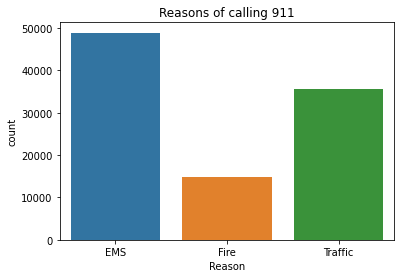

In [12]:
sns.countplot(x='Reason', data=df)
plt.title('Reasons of calling 911')

In [13]:
type(df['timeStamp'].iloc[0])

str

** We use pd.to_datetime to convert the column from strings to DateTime objects. **

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} 
df['Day of Week'] = df['timeStamp'].apply(lambda x: dmap.get(x.dayofweek))

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Create a countplot of the Day of Week column with the hue based off of the Reason column. **

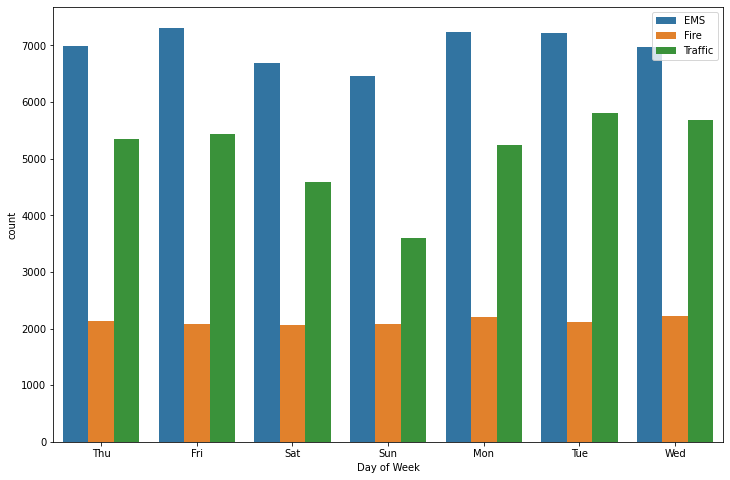

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(loc=1)

**Now the same for Month:**

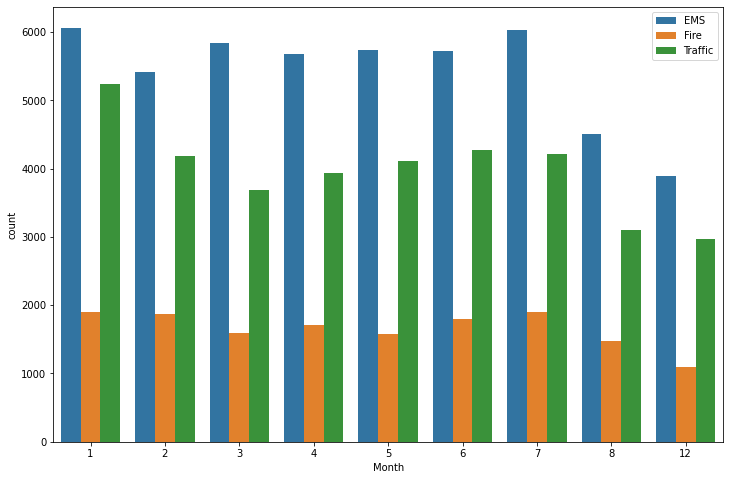

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(loc=1)

____

In [39]:
byMonth = df.groupby(by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

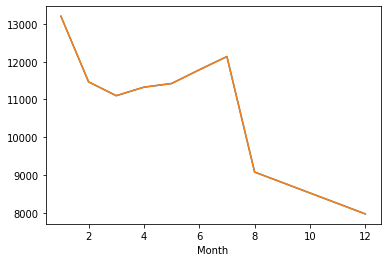

In [59]:
plt.plot(byMonth.index, byMonth['lat'])
# Or
byMonth['lat'].plot()

In [60]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


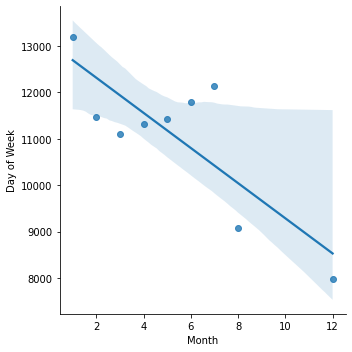

In [61]:

sns.lmplot(x='Month', y='Day of Week', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [65]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [68]:
byDate = df.groupby(by='Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<AxesSubplot:xlabel='Date'>

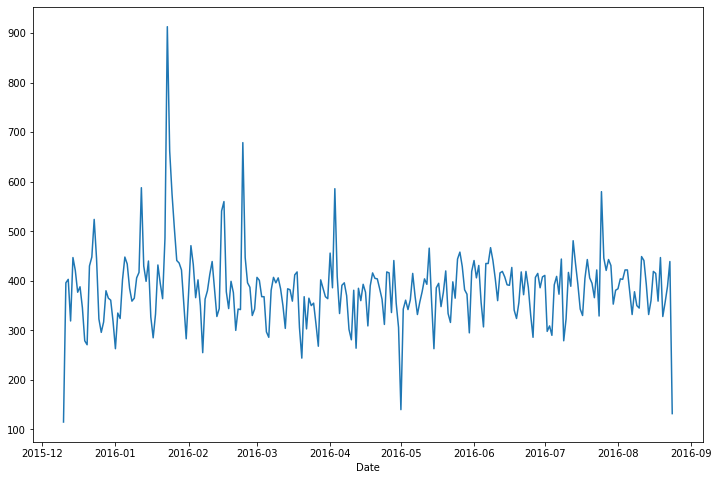

In [71]:
plt.figure(figsize=(12,8))
byDate['lat'].plot()

Text(0.5, 1.0, 'Traffic')

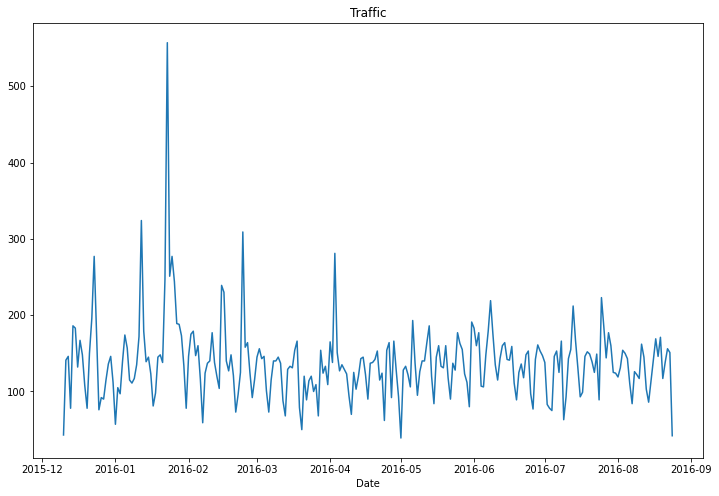

In [81]:
plt.figure(figsize=(12,8))
df[df['Reason'] == 'Traffic'].groupby(by='Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

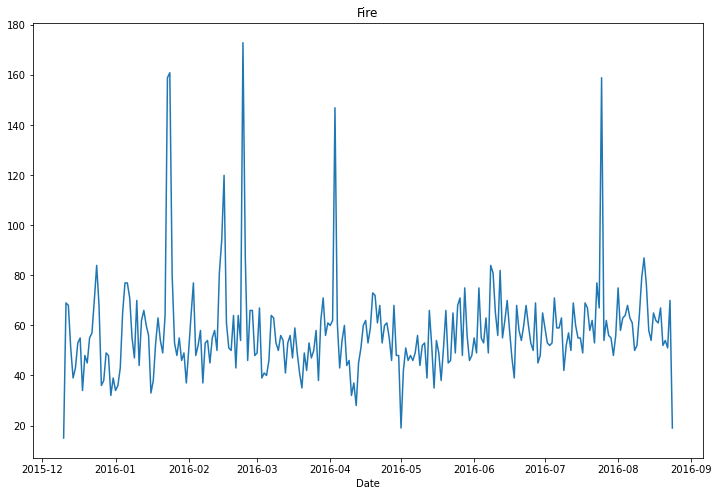

In [82]:
plt.figure(figsize=(12,8))
df[df['Reason'] == 'Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

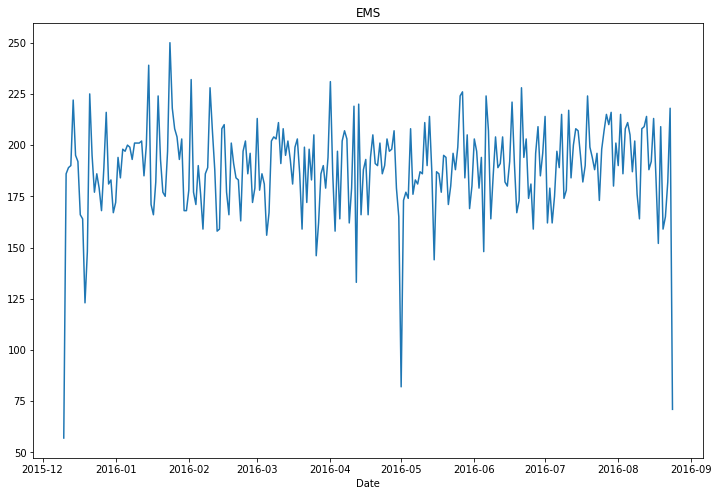

In [83]:
plt.figure(figsize=(12,8))
df[df['Reason'] == 'EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [97]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['lat'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

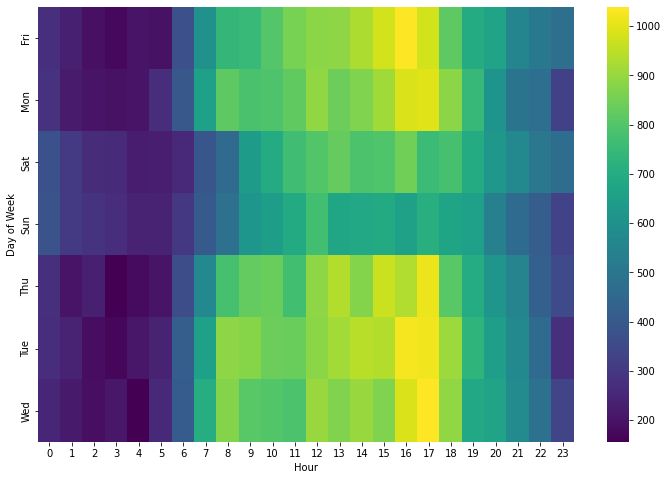

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(dayHour, cmap='viridis')

** Now create a clustermap using this DataFrame. **

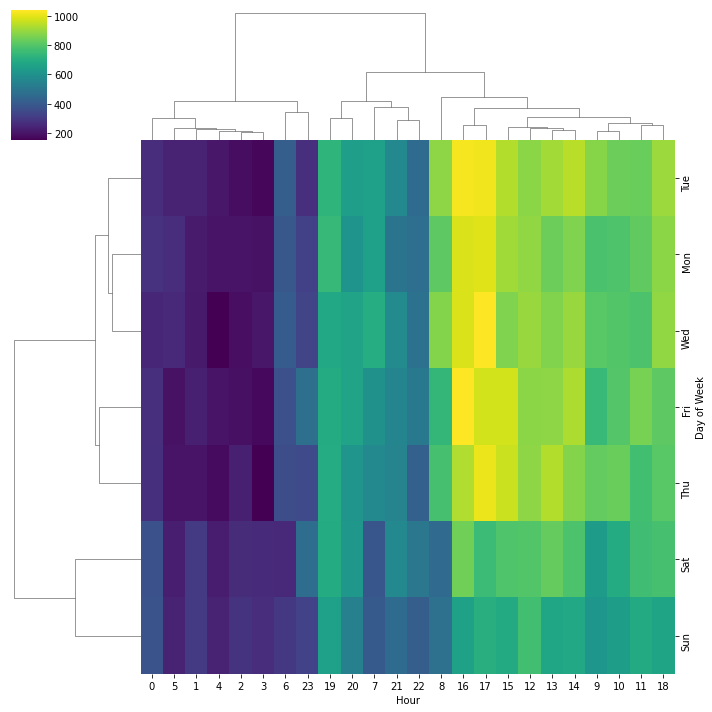

In [103]:
sns.clustermap(dayHour, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [106]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['lat'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

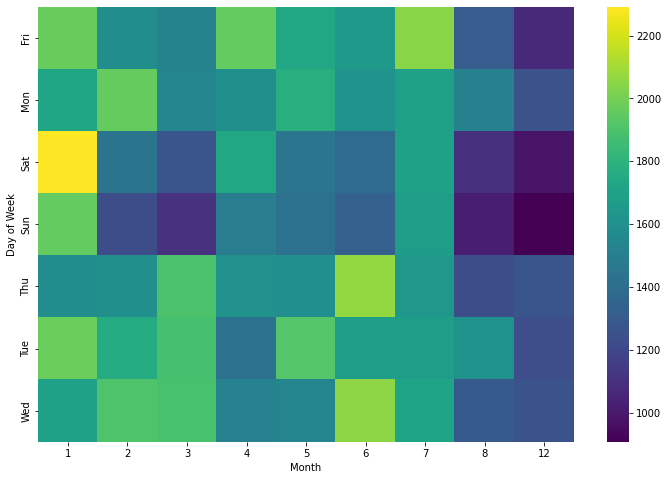

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(dayMonth, cmap='viridis')

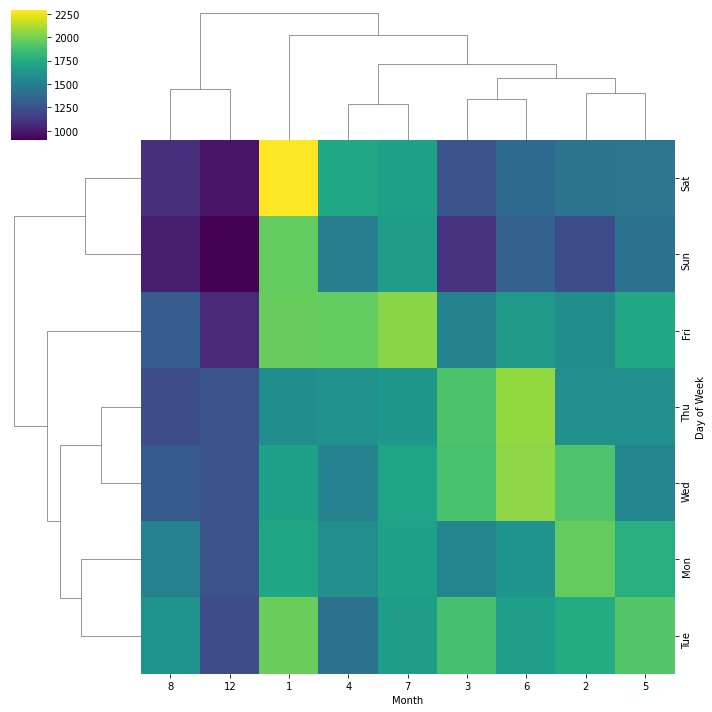

In [110]:
sns.clustermap(dayMonth, cmap='viridis')